In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [12]:
def day_counter(df, bool_col, date_col):
    '''
    El propósito de esta función es contar el número de días que han pasado desde que se activó una columna booleana.

    Parámetros:
    df: DataFrame
    bool_col: str, nombre de la columna booleana en el DataFrame.
    date_col: str, nombre de la columna de fecha en el DataFrame.

    Retorna:
    df: DataFrame con una nueva columna que cuenta el número de días que han pasado desde que se activó la columna booleana.
    '''

    df[date_col] = pd.to_datetime(df[date_col])
    df[bool_col] = df[bool_col].astype(int)
    df.sort_values(by=[date_col], inplace=True)

    # Obtener el primer dia con un 1
    last_date = df.loc[df[bool_col] == 1, date_col].iloc[0]

    # Obtener la primer posicion con un 1
    first_pos = df[bool_col].idxmax()

    for i in range(len(df)):
        if i < first_pos:
            df.loc[i, f'days_since_{bool_col}'] = 0
        else:
            if df.loc[i, bool_col] == 1:
                df.loc[i, f'days_since_{bool_col}'] = 0
                last_date = df.loc[i, date_col]
            else:
                df.loc[i, f'days_since_{bool_col}'] = (df.loc[i, date_col] - last_date).days

    return df

test_df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'promotion': [1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
})

test_df = day_counter(test_df, 'promotion', 'date')
print(test_df)

        date  promotion  days_since_promotion
0 2021-01-01          1                   0.0
1 2021-01-02          0                   1.0
2 2021-01-03          1                   0.0
3 2021-01-04          1                   0.0
4 2021-01-05          1                   0.0
5 2021-01-06          0                   1.0
6 2021-01-07          0                   2.0
7 2021-01-08          0                   3.0
8 2021-01-09          0                   4.0
9 2021-01-10          1                   0.0


In [13]:
def days_with_1_streak(df, bool_col, date_col):
    '''
    El propósito de esta función es contar el número de días consecutivos con una columna booleana activa.

    Parámetros:
    df: DataFrame
    bool_col: str, nombre de la columna booleana en el DataFrame.
    date_col: str, nombre de la columna de fecha en el DataFrame.

    Retorna:
    df: DataFrame con una nueva columna que expresa los dias con la columna booleana activa.
    '''

    df[date_col] = pd.to_datetime(df[date_col])
    df[bool_col] = df[bool_col].astype(int)
    df.sort_values(by=[date_col], inplace=True)
    
    i_streak = 0
    for i in range(len(df)):
        if df.loc[i, bool_col] == 1:
            i_streak += 1
            df.loc[i, f'{bool_col}_streak'] = i_streak
        else:
            df.loc[i, f'{bool_col}_streak'] = 0
            i_streak = 0

    return df
    
test_df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'promotion': [1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
})

test_df = days_with_1_streak(test_df, 'promotion', 'date')
test_df

,date,promotion,promotion_streak
0,2021-01-01,1,1.0
1,2021-01-02,0,0.0
2,2021-01-03,1,1.0
3,2021-01-04,1,2.0
4,2021-01-05,1,3.0
5,2021-01-06,0,0.0
6,2021-01-07,0,0.0
7,2021-01-08,0,0.0
8,2021-01-09,0,0.0
9,2021-01-10,1,1.0


In [14]:
def days_with_0_streak(df, bool_col, date_col):
    '''
    El propósito de esta función es contar el número de días consecutivos con una columna booleana inactiva.

    Parámetros:
    df: DataFrame
    bool_col: str, nombre de la columna booleana en el DataFrame.
    date_col: str, nombre de la columna de fecha en el DataFrame.

    Retorna:
    df: DataFrame con una nueva columna que expresa los dias con la columna booleana inactiva.
    '''

    df[date_col] = pd.to_datetime(df[date_col])
    df[bool_col] = df[bool_col].astype(int)
    df.sort_values(by=[date_col], inplace=True)
    
    i_streak = 0
    for i in range(len(df)):
        if df.loc[i, bool_col] == 0:
            i_streak += 1
            df.loc[i, f'{bool_col}_streak'] = i_streak
        else:
            df.loc[i, f'{bool_col}_streak'] = 0
            i_streak = 0

    return df

test_df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'promotion': [1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
})

test_df = days_with_0_streak(test_df, 'promotion', 'date')
test_df

,date,promotion,promotion_streak
0,2021-01-01,1,0.0
1,2021-01-02,0,1.0
2,2021-01-03,1,0.0
3,2021-01-04,1,0.0
4,2021-01-05,1,0.0
5,2021-01-06,0,1.0
6,2021-01-07,0,2.0
7,2021-01-08,0,3.0
8,2021-01-09,0,4.0
9,2021-01-10,1,0.0


Fitteando una regresión lineal agrupada por:  grupo
Regresión del grupo A


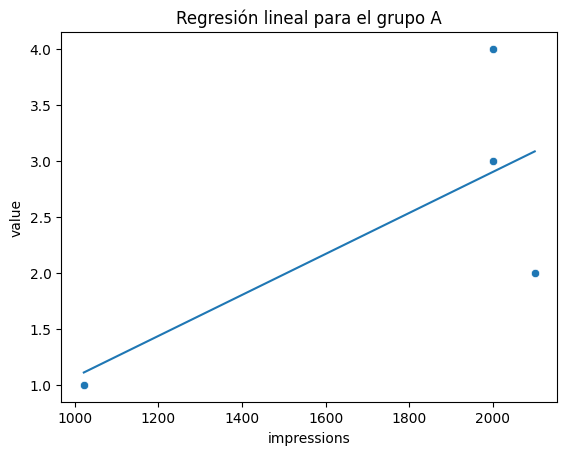

R2 score: 0.5189932834731048
---------------------------------------------
Prediciendo valores para X_test
Regresión del grupo B


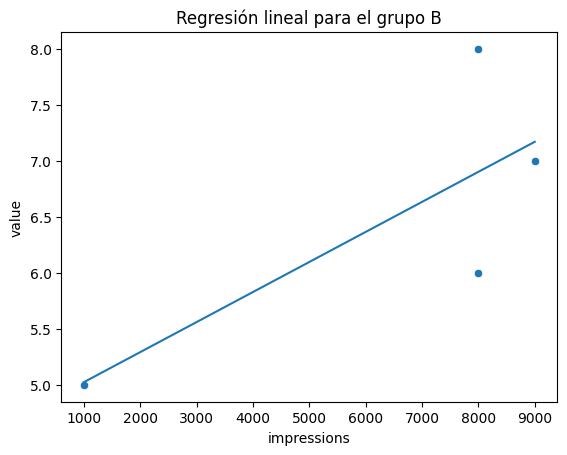

R2 score: 0.5902439024390244
---------------------------------------------
Prediciendo valores para X_test
Regresión del grupo C


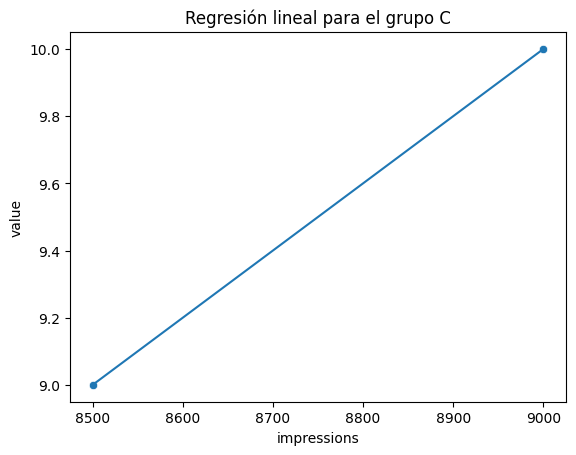

R2 score: 1.0
---------------------------------------------
Prediciendo valores para X_test


,date,investment,impressions,grupo,value,linear_regression_prediction_grupo
0,2021-01-01,100,1022,A,1,1.110951
1,2021-01-02,100,2100,A,2,3.085104
2,2021-01-03,400,2000,A,3,2.901973
3,2021-01-04,400,2000,A,4,2.901973
4,2021-01-05,500,1000,B,5,5.024390
5,2021-01-06,600,8000,B,6,6.902439
6,2021-01-07,500,9000,B,7,7.170732
7,2021-01-08,800,8000,B,8,6.902439
8,2021-01-09,100,8500,C,9,9.000000
9,2021-01-10,100,9000,C,10,10.000000


In [16]:
def fit_linear_regression(df, X, y, group = False, groupping_variable='', intercept=True, plot=False, pred= False, X_test= None):
    '''
    El propósito de esta función es ajustar un modelo de regresión lineal a un conjunto de datos.
    Puede ser útil si buscamos encontrar una relación lineal entre dos o más variables.
    Por ejemplo, encontrar la tendencia de los datos en el tiempo para diferentes subconjuntos de datos.
    En caso de no agrupar, se ajustará un modelo de regresión lineal a todos los datos.

    Parámetros:
    df: DataFrame
    X: str, nombre de la columna que se utilizará como variable independiente. (Puede ser una lista de columnas)
    y: str, nombre de la columna que se utilizará como variable dependiente.
    group: bool, si se quiere ajustar un modelo de regresión lineal para diferentes subconjuntos de datos.
    groupping_variable: str, nombre de la columna que se utilizará para agrupar los datos. 
        Por ejemplo, si elegimos por año, se ajustará un modelo de regresión lineal para cada año.
    intercept: bool, si se quiere incluir el intercepto en el modelo.
    plot: bool, si se quiere graficar la relación entre las variables.
    pred: bool, si se quiere predecir los valores de y para un conjunto de datos de test.
    X_test: DataFrame, conjunto de datos de prueba para evaluar el modelo. 
        (El modelo va a predecir los valores para X_test usando los coeficientes ajustados en el conjunto de entrenamiento)


    Retorna:
    df: DataFrame con una nueva columna que contiene las predicciones del modelo de regresión lineal.
    X_test: DataFrame con una nueva columna que contiene las predicciones del modelo de regresión lineal.
    '''

    if group == False:
        print('Fitteando una regresión lineal en todo el conjunto de datos (sin agrupaciones)')
        X_cols = df[X]
        y_cols = df[y]

        if intercept:
            model = LinearRegression().fit(X_cols, y_cols)
        else:
            model = LinearRegression(fit_intercept=False).fit(X_cols, y_cols)

        df['linear_regression_prediction'] = model.predict(X_cols)
        

        if plot == True:
            if len(X_cols.columns) == 1:
                sns.scatterplot(x=X_cols.iloc[:, 0], y=y_cols, data=df)
                sns.lineplot(x=X_cols.iloc[:, 0], y=df['linear_regression_prediction'], data=df)
                plt.title('Regresión lineal')
                plt.show()
            else:
                print('No se puede graficar la relación entre más de dos variables')
        print(f'R2 score: {r2_score(y_cols, df["linear_regression_prediction"])}')

        if pred == True:
            print('Prediciendo valores para X_test')
            X_test = X_test[X]
            X_test['linear_regression_prediction'] = model.predict(X_test)
            
            return df, X_test
        else:

            return df
        
    else:
        temp_df = df.copy()
        print('Fitteando una regresión lineal agrupada por: ', groupping_variable)

        for group in temp_df[groupping_variable].unique():
            print(f'Regresión del grupo {group}')
            df_groupped = temp_df[temp_df[groupping_variable] == group]
            X_cols = df_groupped[X]
            y_cols = df_groupped[y]

            if intercept:
                model = LinearRegression().fit(X_cols, y_cols)
            else:
                model = LinearRegression(fit_intercept=False).fit(X_cols, y_cols)
                
            df.loc[df[groupping_variable] == group, f'linear_regression_prediction_{groupping_variable}'] = model.predict(X_cols)
            df_groupped['linear_regression_prediction'] = model.predict(X_cols)

            if plot == True:
                if len(X_cols.columns) == 1:
                    sns.scatterplot(x=X_cols.iloc[:, 0], y=y_cols, data=df_groupped)
                    sns.lineplot(x=X_cols.iloc[:, 0], y='linear_regression_prediction', data=df_groupped)
                    plt.title(f'Regresión lineal para el grupo {group}')
                    plt.show()
                else:
                    print('No se puede graficar la relación entre más de dos variables')
            print(f'R2 score: {r2_score(y_cols, df_groupped["linear_regression_prediction"])}')

            print('---------------------------------------------')

            if pred:
                print('Prediciendo valores para X_test')
                X_test_groupped = X_test.copy()
                X_test_groupped = X_test_groupped.loc[X_test_groupped[groupping_variable] == group, X]
                X_test.loc[X_test[groupping_variable] == group, 'linear_regression_prediction'] = model.predict(X_test_groupped)

        if pred:
            return df, X_test
        else:
            return df

## Ejemplo de uso 
df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'investment': [100, 100, 400, 400, 500, 600, 500, 800, 100, 100],
    'impressions': [1022, 2100, 2000, 2000, 1000, 8000, 9000, 8000, 8500, 9000],
    'grupo': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
    'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Dataframe que usaremos para predecir
test_df = pd.DataFrame({
    'investment': [100, 200, 100, 400, 500],
    'impressions': [1000, 4000, 1000, 4000, 5000],
    'grupo': ['A', 'A', 'B', 'B', 'C']
})

df, test_df= fit_linear_regression(df, ['impressions'], 'value', group=True, intercept=True ,groupping_variable='grupo' ,plot=True, pred=True, X_test=test_df)
df


,date,value,fourier_sin_1,fourier_cos_1,fourier_sin_2,fourier_cos_2,fourier_sin_3,fourier_cos_3
0,2021-01-01,94,1.721336e-02,0.999852,3.442161e-02,0.999407,5.161967e-02,0.998667
1,2021-01-02,17,3.442161e-02,0.999407,6.880243e-02,0.997630,1.031017e-01,0.994671
2,2021-01-03,60,5.161967e-02,0.998667,1.031017e-01,0.994671,1.543088e-01,0.988023
3,2021-01-04,71,6.880243e-02,0.997630,1.372788e-01,0.990532,2.051045e-01,0.978740
4,2021-01-05,63,8.596480e-02,0.996298,1.712931e-01,0.985220,2.553533e-01,0.966848
...,...,...,...,...,...,...,...,...
360,2021-12-27,76,-6.880243e-02,0.997630,-1.372788e-01,0.990532,-2.051045e-01,0.978740
361,2021-12-28,45,-5.161967e-02,0.998667,-1.031017e-01,0.994671,-1.543088e-01,0.988023
362,2021-12-29,61,-3.442161e-02,0.999407,-6.880243e-02,0.997630,-1.031017e-01,0.994671
363,2021-12-30,81,-1.721336e-02,0.999852,-3.442161e-02,0.999407,-5.161967e-02,0.998667


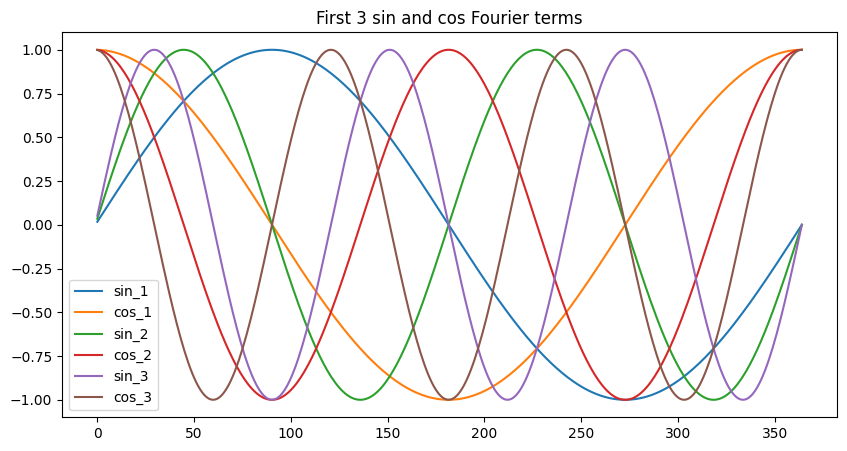

In [43]:
def add_fourier_terms(df, date_col, n_terms, pred = False ,pred_df=None):
    '''
    El propósito de esta función es agregar términos de Fourier a un DataFrame.
    Son funciones de seno y coseno que se utilizan para modelar la estacionalidad en series de tiempo.
    Importante notar que esta función solo agrega terminos de Fourier para la estacionalidad anual. 
    En caso de querer agregar estacionalidad de otro periodo, se podría ajustar la funcion.
        Por ejemplo: para estacionalidad mensual, la formula sería sin/cos(2 * np.pi * i * df[date_col].dt.month / 12)

    Los terminos de Fourier nos podrían ser útiles para un xgboost como variables independientes, 
    aunque las variables de fecha ya podrían ser suficientes para capturar la estacionalidad.
    
    Parámetros:
    df: DataFrame
    date_col: str, nombre de la columna de fecha en el DataFrame.
    n_terms: int, número de términos de Fourier que se agregarán al DataFrame.

    Retorna:
    df: DataFrame con los términos de Fourier agregados.
    '''

    df[date_col] = pd.to_datetime(df[date_col])
    for i in range(1, n_terms+1):
        df[f'fourier_sin_{i}'] = np.sin(2 * np.pi * i * df[date_col].dt.dayofyear / 365)
        df[f'fourier_cos_{i}'] = np.cos(2 * np.pi * i * df[date_col].dt.dayofyear / 365)

    if pred:
        pred_df[date_col] = pd.to_datetime(pred_df[date_col])
        for i in range(1, n_terms+1):
            pred_df[f'fourier_sin_{i}'] = np.sin(2 * np.pi * i * pred_df[date_col].dt.dayofyear / 365)
            pred_df[f'fourier_cos_{i}'] = np.cos(2 * np.pi * i * pred_df[date_col].dt.dayofyear / 365)
        return df, pred_df
    else:
        return df

test_df = pd.DataFrame({
    # Todo un año
    'date': pd.date_range(start='2021-01-01', end='2021-12-31'),
    'value': np.random.randint(0, 100, 365)
})

pred_df = pd.DataFrame({
    'date': ['2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10']
})


test_df, pred_df = add_fourier_terms(test_df, 'date', 3, pred=True, pred_df=pred_df)
display(test_df)

## Plotting the first 20 cos and sin terms
plt.figure(figsize=(10, 5))
for i in range(1, 4):
    plt.plot(test_df[f'fourier_sin_{i}'], label=f'sin_{i}')
    plt.plot(test_df[f'fourier_cos_{i}'], label=f'cos_{i}')
plt.legend()
plt.title('First 3 sin and cos Fourier terms')
plt.show()